In [1]:
#import library

import pandas as pd
import numpy as np


In [2]:
# read data from excel

var = pd.read_excel('E:\JupyterDemo\Datasets\Variables_diabetes_EDA.xlsx')
#var
df = pd.read_excel('E:\JupyterDemo\Datasets\diabetes_mandatory_EDA.xlsx',names=var['Variables used'])

In [3]:
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Check null values or missing values
df.isna().any()

Pregnancies                   False
Glucose                       False
Blood Pressure                False
Skin Thickness                False
Insulin                       False
BMI                           False
Diabetes Pedigree Function    False
Age                           False
Outcome                       False
dtype: bool

In [5]:
# Data Statitstics or Data Describe
df.describe(include='all')

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Feature engineering
- It is a process of creating a new featuring which can add meaningful infromation to the model.


### Feature Scaling 

Standardization

Standardization = (x - mean)/ standard deviation



- 1.   Standard normal distribution
- 2.   Mean 0 and SD is 1
- 3.   Ranges between -3 and 3
- 4.   Appropriate when data is normally distributed
- 5.   Takes care of outliers (Anything above -3 and 3)



In [7]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8]

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)


In [8]:
X

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

## Other Types of Scaling 

Normalization 

Min Max Scaling 

- 1.   Min-max
- 2.   Appropriate when data is not normally distributed
- 3.   Ranges between 0 and 1

In [9]:
X_min_max = (X - X.min()) / (X.max() - X.min())
X_min_max

array([[0.30016248, 0.27416544, 0.363995  , ..., 0.31510522, 0.34494117,
        0.36131536],
       [0.49423146, 0.56056301, 0.35434466, ..., 0.27601322, 0.43543644,
        0.3692674 ],
       [0.30016248, 0.28585513, 0.363995  , ..., 0.33287432, 0.29306849,
        0.28179503],
       ...,
       [0.41105904, 0.37937271, 0.39294602, ..., 0.3103668 , 0.315058  ,
        0.35336333],
       [0.30016248, 0.39398483, 0.33504398, ..., 0.35656644, 0.34437734,
        0.48854791],
       [0.30016248, 0.29754483, 0.38329568, ..., 0.36012026, 0.33479217,
        0.29769909]])

## Feature Extraction:-

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content 
in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [10]:
from sklearn.decomposition import PCA
pca=PCA()
fit=pca.fit(X)

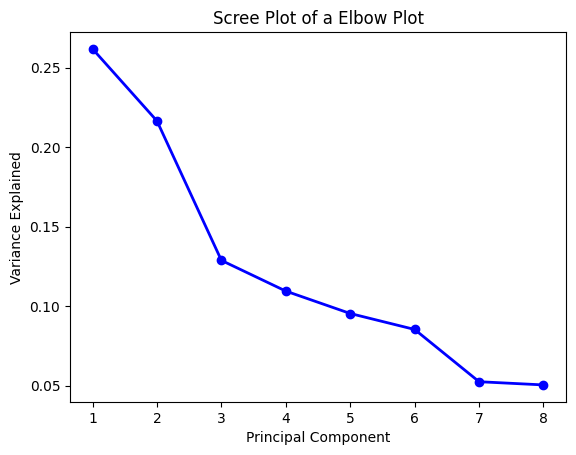

In [11]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of a Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

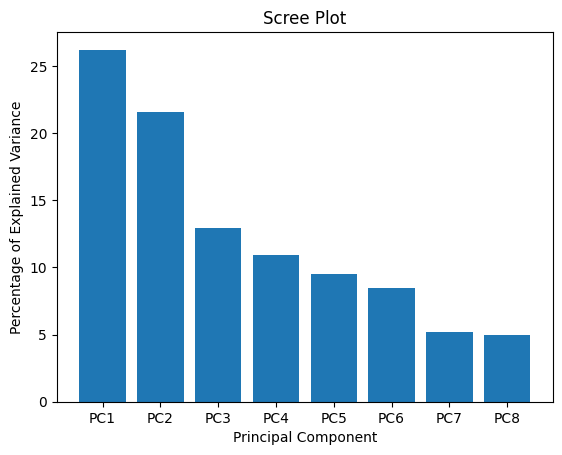

In [12]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [13]:
pca.explained_variance_ratio_

array([0.26177445, 0.21645592, 0.12875656, 0.10944991, 0.09535764,
       0.08531775, 0.05245327, 0.0504345 ])

In [14]:
#Transforming x_train
x_data = pca.transform(X)
x_data

array([[-1.11779243, -0.73731873, -0.71325901, ..., -0.40757895,
         0.72819161,  0.40855295],
       [-0.40073495,  1.59486505,  1.76070082, ..., -0.03886237,
        -1.22755974,  0.98288485],
       [-1.10882539, -1.27333811, -0.66250886, ..., -0.41307421,
        -0.02118489, -0.13518053],
       ...,
       [-0.28159201,  0.09775941, -0.07651277, ..., -0.53754162,
        -0.35678312,  0.26332128],
       [-1.06154559,  0.83604582,  0.4261683 , ...,  0.15106377,
         1.21803453, -0.4439487 ],
       [-0.83468251, -1.15451804, -1.00881929, ..., -0.15153282,
         0.20570727,  0.53138061]])

In [15]:
import statsmodels.api as sm
sm.add_constant(x_data)

array([[ 1.        , -1.11779243, -0.73731873, ..., -0.40757895,
         0.72819161,  0.40855295],
       [ 1.        , -0.40073495,  1.59486505, ..., -0.03886237,
        -1.22755974,  0.98288485],
       [ 1.        , -1.10882539, -1.27333811, ..., -0.41307421,
        -0.02118489, -0.13518053],
       ...,
       [ 1.        , -0.28159201,  0.09775941, ..., -0.53754162,
        -0.35678312,  0.26332128],
       [ 1.        , -1.06154559,  0.83604582, ...,  0.15106377,
         1.21803453, -0.4439487 ],
       [ 1.        , -0.83468251, -1.15451804, ..., -0.15153282,
         0.20570727,  0.53138061]])

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
yp= lda.predict(X)
yp

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,